In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import hvplot.pandas
import numpy as np
%matplotlib inline

In [3]:
# Stored the data in a Pandas DataFrame
# Read the data from the SP500.csv file into a Pandas DataFrame
df_SP500 = pd.read_csv(
    'SP500.csv',
    index_col='Date',
    parse_dates=True,
).dropna()

# Review the DataFrame
df_SP500.head()

,Close/Last,Open,High,Low
Date,,,,
2024-01-31,4845.65,4899.19,4906.75,4845.15
2024-01-30,4924.97,4925.89,4931.09,4916.27
2024-01-29,4927.93,4892.95,4929.31,4887.40
2024-01-26,4890.97,4888.91,4906.69,4881.47
2024-01-25,4894.16,4886.66,4898.15,4869.34


In [4]:
# Display column names for better context
df_SP500.columns

Index(['Close/Last', 'Open', 'High', 'Low'], dtype='object')

In [19]:
# Plot the DataFrame
df_SP500.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [6]:
selected_columns = df_SP500[['Close/Last']]

In [7]:
selected_columns.head()

,Close/Last
Date,
2024-01-31,4845.65
2024-01-30,4924.97
2024-01-29,4927.93
2024-01-26,4890.97
2024-01-25,4894.16


In [8]:
# Reset the index of the DataFrame
prophet_df_SP500 = selected_columns.reset_index()

# Review the first and last five rows of the DataFrame
display(prophet_df_SP500.head())
display(prophet_df_SP500.tail())

,Date,Close/Last
0,2024-01-31,4845.65
1,2024-01-30,4924.97
2,2024-01-29,4927.93
3,2024-01-26,4890.97
4,2024-01-25,4894.16


,Date,Close/Last
1253,2019-02-07,2706.05
1254,2019-02-06,2731.61
1255,2019-02-05,2737.70
1256,2019-02-04,2724.87
1257,2019-02-01,2706.53


In [9]:
# Rename the columns to names that Prophet recognizes
prophet_df_SP500.rename(columns={'Date': 'ds', 'Close/Last': 'y'}, inplace=True)


In [10]:
# Prepare the training data to be read into a prophet model
prophet_df_SP500.head()

,ds,y
0,2024-01-31,4845.65
1,2024-01-30,4924.97
2,2024-01-29,4927.93
3,2024-01-26,4890.97
4,2024-01-25,4894.16


In [11]:
# Create a new DataFrame starting from '2023-01-31'
prophet_df_SP500_from_2023 = prophet_df_SP500[prophet_df_SP500['ds'] >= '2023-01-31']

In [12]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with your dataframe
model.fit(prophet_df_SP500_from_2023)

# Create a DataFrame for future predictions (predicting from 2024 Jan, 31 to 2025 Jan, 31)
future = model.make_future_dataframe(periods=365)  

# Use the model to make predictions
forecast = model.predict(future)

# Filter the forecast DataFrame to include data from January 31, 2024, onwards
# forecast_from_2024 = forecast[forecast['ds'] >= '2024-01-31']


22:51:03 - cmdstanpy - INFO - Chain [1] start processing
22:51:03 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Showing the 25
# forecast_from_2024.head()

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-31,4124.992798,4072.301478,4209.608531,4124.992798,4124.992798,15.189168,15.189168,15.189168,15.189168,15.189168,15.189168,0.0,0.0,0.0,4140.181966
1,2023-02-01,4120.299045,4057.724983,4190.913131,4120.299045,4120.299045,6.385237,6.385237,6.385237,6.385237,6.385237,6.385237,0.0,0.0,0.0,4126.684282
2,2023-02-02,4115.605293,4054.896097,4192.701708,4115.605293,4115.605293,9.861557,9.861557,9.861557,9.861557,9.861557,9.861557,0.0,0.0,0.0,4125.466850
3,2023-02-03,4110.911541,4061.230744,4193.954671,4110.911541,4110.911541,13.910140,13.910140,13.910140,13.910140,13.910140,13.910140,0.0,0.0,0.0,4124.821681
4,2023-02-06,4096.830285,4048.038951,4179.193085,4096.830285,4096.830285,17.730042,17.730042,17.730042,17.730042,17.730042,17.730042,0.0,0.0,0.0,4114.560327


In [14]:
# Save the DataFrame to a CSV file to use in a correlation dataset
forecast.to_csv('forecast_sp500_subset.csv', index=False)

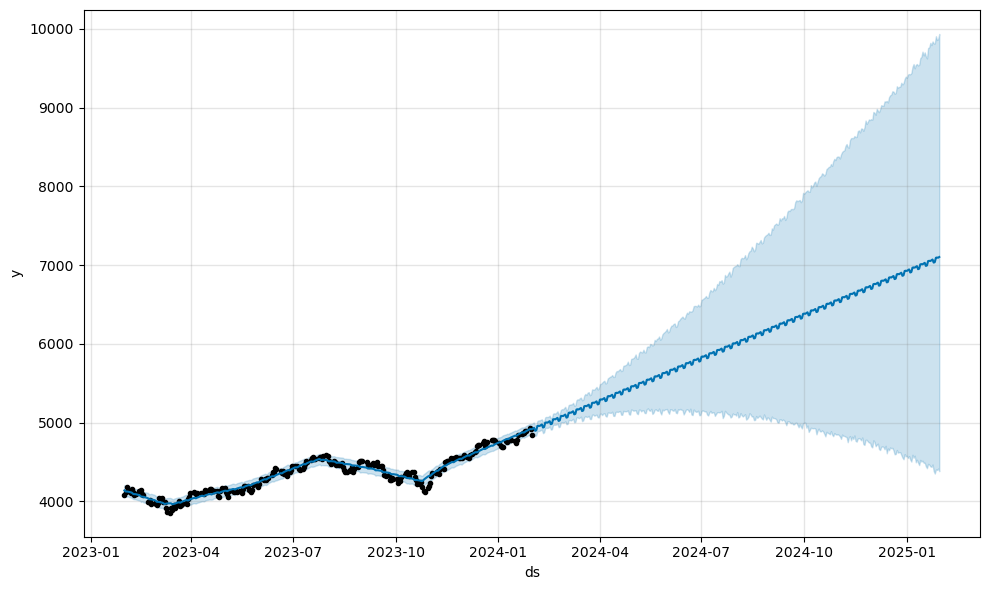

In [89]:
# Plotted the Prophet predictions for the S&P500 data
figures = model.plot(forecast)

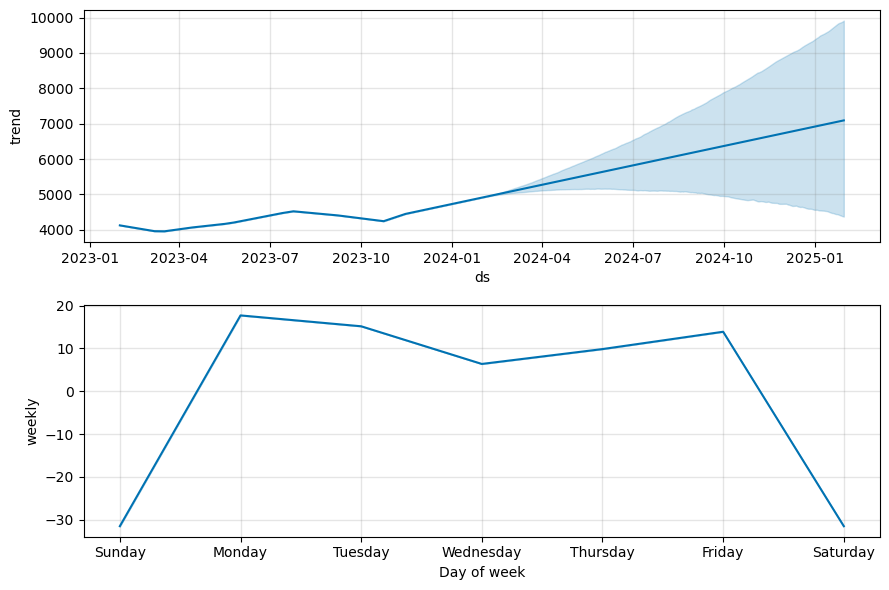

In [90]:
figures = model.plot_components(forecast)

In [91]:
forecast = forecast.set_index(["ds"])
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2023-01-31,4124.992798,4073.592044,4207.827643,4124.992798,4124.992798,15.189168,15.189168,15.189168,15.189168,15.189168,15.189168,0.0,0.0,0.0,4140.181966
2023-02-01,4120.299045,4059.897817,4199.059595,4120.299045,4120.299045,6.385237,6.385237,6.385237,6.385237,6.385237,6.385237,0.0,0.0,0.0,4126.684282
2023-02-02,4115.605293,4060.122245,4190.534102,4115.605293,4115.605293,9.861557,9.861557,9.861557,9.861557,9.861557,9.861557,0.0,0.0,0.0,4125.466850
2023-02-03,4110.911541,4063.825930,4190.932385,4110.911541,4110.911541,13.910140,13.910140,13.910140,13.910140,13.910140,13.910140,0.0,0.0,0.0,4124.821681
2023-02-06,4096.830285,4047.857396,4184.433204,4096.830285,4096.830285,17.730042,17.730042,17.730042,17.730042,17.730042,17.730042,0.0,0.0,0.0,4114.560327


<Axes: xlabel='ds'>

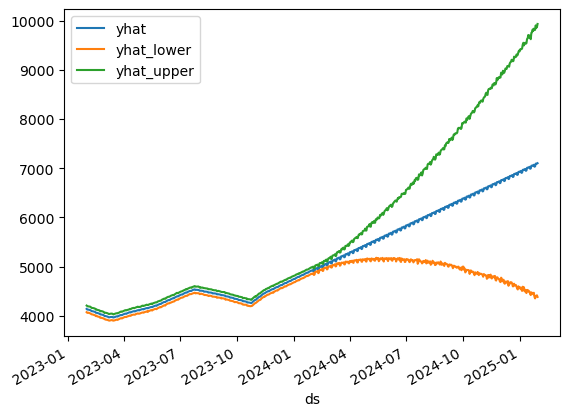

In [92]:
forecast[["yhat", "yhat_lower", "yhat_upper"]].plot()

In [93]:
forecast.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [94]:
#forecast_from_2024 = forecast_from_2024.loc[["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast = forecast_from_2024.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast[["Best Case", "Worst Case", "Most Likely Case"]].head(10)

,Best Case,Worst Case,Most Likely Case
251,4982.361689,4847.004862,4915.909875
252,4996.693365,4862.105909,4925.369201
253,5004.777941,4869.672882,4935.400789
254,4962.328740,4832.219126,4895.935581
255,4968.901186,4838.980089,4901.918589
256,5026.876008,4893.727309,4957.169706
257,5028.038424,4892.360019,4960.611838
258,5028.015442,4888.119617,4957.790911
259,5031.223724,4903.341628,4967.250236
260,5043.003362,4910.623409,4977.281825


<Axes: >

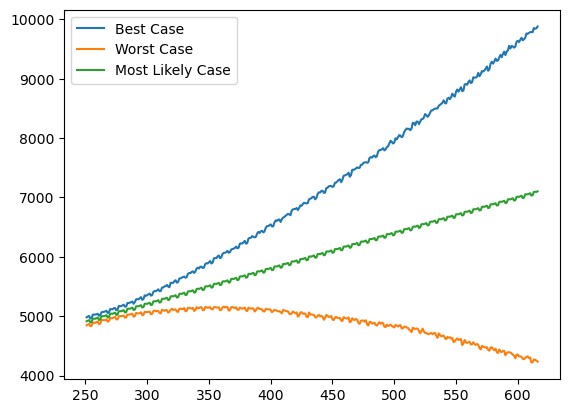

In [95]:
# Repot graph with new labels
forecast[["Best Case", "Worst Case", "Most Likely Case"]].plot()

In [97]:
forecast[["Best Case", "Worst Case", "Most Likely Case"]].mean()

Best Case           7119.459670
Worst Case          4878.732680
Most Likely Case    6001.467459
dtype: float64

In [98]:
# Selecting only the specified columns
forecast_Subset = forecast[["Best Case", "Worst Case", "Most Likely Case"]]

forecast_Subset.tail()

,Best Case,Worst Case,Most Likely Case
612,9782.665748,4226.568733,7037.851408
613,9852.734042,4271.353061,7093.102525
614,9842.584595,4270.161076,7096.544657
615,9846.994946,4253.234676,7093.723730
616,9879.486273,4236.604759,7103.183055


In [99]:
# Save the DataFrame to a CSV file
forecast_Subset.to_csv('forecast_sp500_subset.csv', index=False)